In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od

In [ ]:
url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitro117
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:26<00:00, 108MB/s]


In [ ]:
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="../content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="../content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",image_size=(256, 256))
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
import os

class_names = sorted(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

print(f'The total number of classes is: {len(class_names)}')


for class_name in class_names:
    print(class_name)

The total number of classes is: 38
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_viru

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [ ]:
ep = 6
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/6
2197/2197 [==============================] - 395s 172ms/step - loss: 1.5912 - accuracy: 0.5379 - val_loss: 0.5993 - val_accuracy: 0.8131
Epoch 2/6
2197/2197 [==============================] - 377s 172ms/step - loss: 0.4505 - accuracy: 0.8555 - val_loss: 0.3002 - val_accuracy: 0.9001
Epoch 3/6
2197/2197 [==============================] - 360s 164ms/step - loss: 0.2647 - accuracy: 0.9130 - val_loss: 0.2048 - val_accuracy: 0.9324
Epoch 4/6
2197/2197 [==============================] - 380s 173ms/step - loss: 0.1824 - accuracy: 0.9401 - val_loss: 0.1654 - val_accuracy: 0.9474
Epoch 5/6
2197/2197 [==============================] - 379s 173ms/step - loss: 0.1344 - accuracy: 0.9544 - val_loss: 0.1705 - val_accuracy: 0.9447
Epoch 6/6
2197/2197 [==============================] - 379s 172ms/step - loss: 0.1006 - accuracy: 0.9662 - val_loss: 0.1393 - val_accuracy: 0.9558


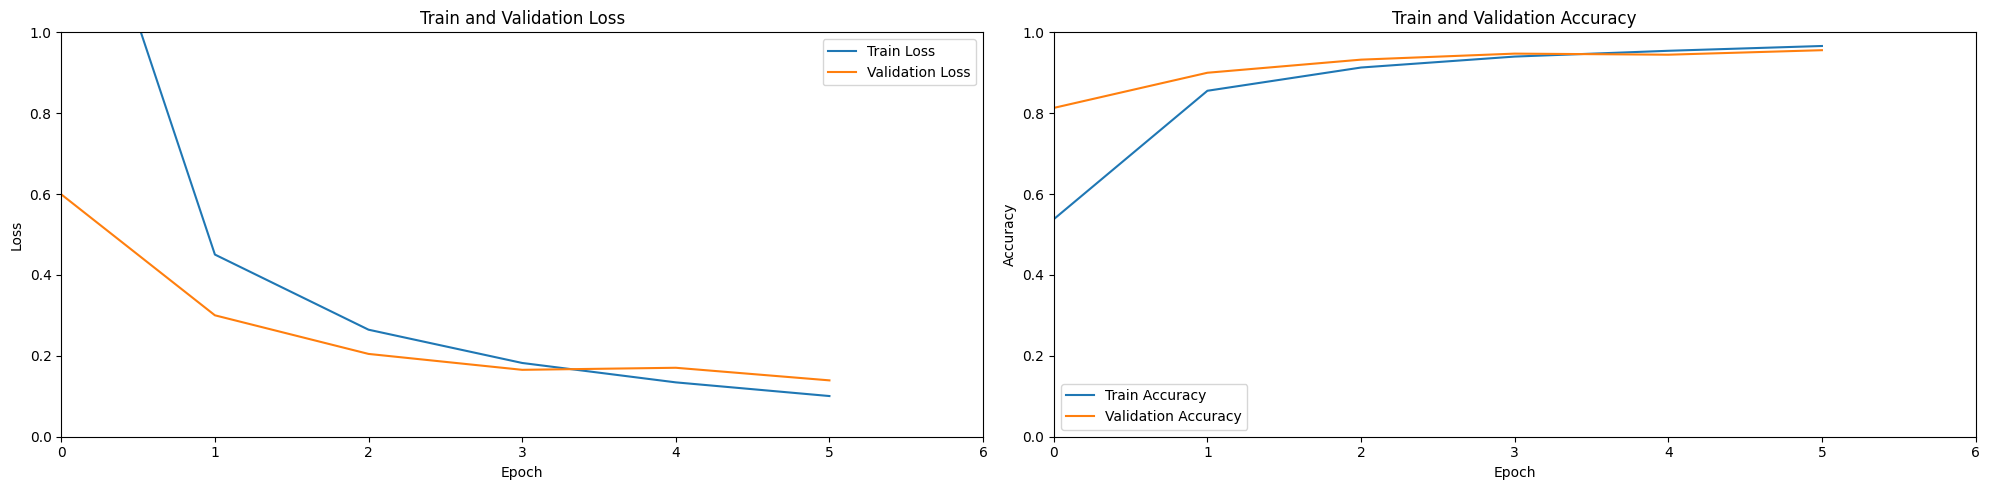

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 6)
plt.ylim(0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 6)
plt.ylim(0,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 119ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
model.save("Minor_Project_CNN.h5")


<Figure size 2000x500 with 0 Axes>

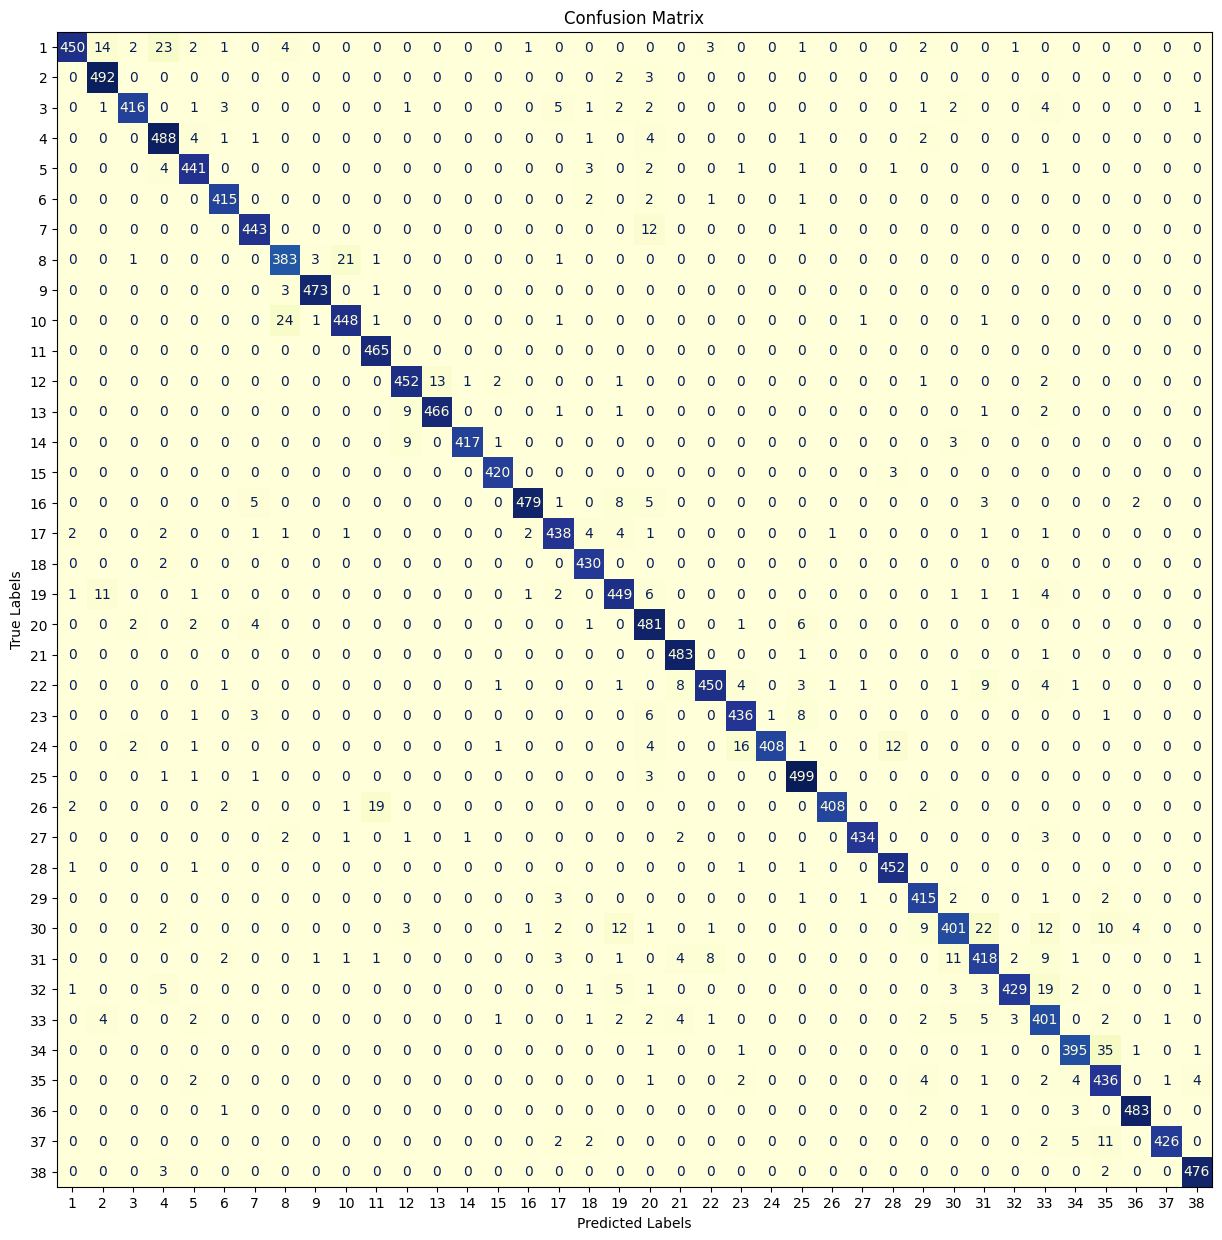

In [ ]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from google.colab import files

In [ ]:
ul=files.upload()

Saving corn blight.jpg to corn blight.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

def preimg(image_path,target_size=(255,255)):
  img=load_img(image_path,target_size=target_size)
  x=img_to_array(img)
  x=x.astype('float32')/255.
  x=np.expand_dims(x,axis=0)
  return x

x=preimg('/content/corn blight.jpg')

In [ ]:
predictions=model.predict(x)
predictions[0]

1/1 [==============================] - 0s 21ms/step


array([5.2522206e-05, 3.4641900e-05, 6.7070500e-06, 6.5016036e-07,
       2.4731480e-06, 6.8761642e-07, 6.6819814e-07, 5.4096192e-01,
       4.2947972e-01, 1.4225941e-03, 3.7329199e-03, 7.5910970e-07,
       6.1112456e-07, 7.3853294e-06, 2.3187757e-05, 1.7088017e-06,
       2.4356150e-05, 7.8523169e-07, 2.2550386e-05, 2.2187560e-06,
       1.0346502e-06, 2.8843867e-09, 1.9915684e-05, 5.6730955e-06,
       3.9607633e-07, 9.6610629e-06, 2.3858543e-02, 3.0135143e-07,
       1.8599536e-07, 2.6582650e-04, 5.3909855e-05, 4.0480192e-08,
       3.5423914e-06, 3.3703569e-09, 5.6381043e-07, 9.7555166e-08,
       7.4003111e-08, 1.1699393e-06], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions)
print(f"this image : Predicted Class: {predicted_class}, Class name: {class_names[predicted_class]}")

this image : Predicted Class: 7, Class name: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
